# VEHICLES SALES DATA #

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
df = pd.read_csv("car_prices.csv")
df.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


In [330]:
df.drop(["trim","vin","condition","color","interior","seller",'transmission'],axis = 1,inplace = True)
df.head(1)

,year,make,model,body,state,odometer,mmr,sellingprice,saledate
0,2015,Kia,Sorento,SUV,ca,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [331]:
df.shape

(558837, 9)

In [332]:
df.isnull().sum()

year                0
make            10301
model           10399
body            13195
state               0
odometer           94
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   body          545642 non-null  object 
 4   state         558837 non-null  object 
 5   odometer      558743 non-null  float64
 6   mmr           558799 non-null  float64
 7   sellingprice  558825 non-null  float64
 8   saledate      558825 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 38.4+ MB


In [334]:
df['SaleDate'] = pd.to_datetime(df['saledate'], errors='coerce', utc = True)

In [335]:
df['SaleDate'].dtype

datetime64[ns, UTC]

In [336]:
df.head(1)

,year,make,model,body,state,odometer,mmr,sellingprice,saledate,SaleDate
0,2015,Kia,Sorento,SUV,ca,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 04:30:00+00:00


In [337]:
df['salemonth'] = df['SaleDate'].dt.month
df['saleyear'] = df['SaleDate'].dt.year
df.head(1)

,year,make,model,body,state,odometer,mmr,sellingprice,saledate,SaleDate,salemonth,saleyear
0,2015,Kia,Sorento,SUV,ca,16639.0,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014-12-16 04:30:00+00:00,12.0,2014.0


In [338]:
df.drop(['saledate','SaleDate'],axis = 1, inplace = True)
df.head(1)

,year,make,model,body,state,odometer,mmr,sellingprice,salemonth,saleyear
0,2015,Kia,Sorento,SUV,ca,16639.0,20500.0,21500.0,12.0,2014.0


In [339]:
df.isnull().sum()

year                0
make            10301
model           10399
body            13195
state               0
odometer           94
mmr                38
sellingprice       12
salemonth          38
saleyear           38
dtype: int64

### Filling Null Values ###

**Non Numereical Null Values are filled as follow :-**

In [340]:
import warnings
warnings.filterwarnings('ignore')


df['make'] = df['make'].fillna(method = 'ffill')

df['model'] = df['model'].fillna(method = 'ffill')

df['body'] = df['body'].fillna(method = 'ffill')

df['salemonth'] = df['salemonth'].fillna(method = 'bfill')

df['saleyear'] = df['saleyear'].fillna(method = 'bfill')

**Numereical Null Values are filled as follow :-**

In [341]:
df.odometer.mean()

68320.01776666554

In [342]:
df.odometer = df.odometer.fillna(68320)

In [257]:
df.mmr.mean()

13769.377495306899

In [343]:
df.mmr = df.mmr.fillna(13769)

In [344]:
df['sellingprice'].mean()

13611.358810003132

In [345]:
df['sellingprice'] = df['sellingprice'].fillna(13611)

In [346]:
df.isnull().sum()

year            0
make            0
model           0
body            0
state           0
odometer        0
mmr             0
sellingprice    0
salemonth       0
saleyear        0
dtype: int64

**No null values are present anymore**

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          558837 non-null  object 
 2   model         558837 non-null  object 
 3   body          558837 non-null  object 
 4   state         558837 non-null  object 
 5   odometer      558837 non-null  float64
 6   mmr           558837 non-null  float64
 7   sellingprice  558837 non-null  float64
 8   salemonth     558837 non-null  float64
 9   saleyear      558837 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 42.6+ MB


In [348]:
df.odometer = df.odometer.astype('int')
df.mmr = df.mmr.astype('int')
df.sellingprice = df.sellingprice.astype('int')
df.salemonth = df.salemonth.astype('int')
df.saleyear = df.saleyear.astype('int')

# EDA #

**Que-1. What is the trend in vehicle sales over the years covered by the dataset?**

In [349]:
a = df.groupby('saleyear').agg({'sellingprice':'sum'})
a

,sellingprice
saleyear,
2014,607649230
2015,6998881689


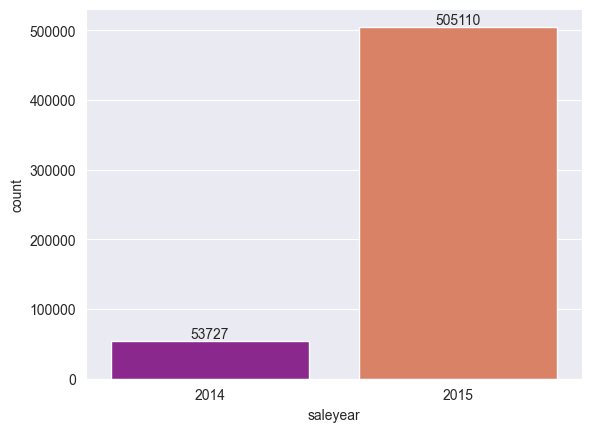

In [384]:
ax = sns.countplot(data=df, x='saleyear', palette = 'plasma')
for bars in ax.containers:
    ax.bar_label(bars)

**INSIGHT -- In 2014,53737 cars were sold for Rs 0.6 Billion  & in 2015, 505110 cars were sold for Rs 6.9 Billion.** 

**Que-2▪ Which vehicle brands/models are the top sellers overall?**

In [351]:
#STEP-1 checking names in 'make' column
df.make.unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', 'bmw', 'Dodge', 'FIAT',
       'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC', 'mitsubishi', 'Ram',
       'smart', 'chevrolet', 'Bentley', 'chrysler', 'pontiac', 'Pontiac',
       'Saturn', 'Maserati', 'Mercury', 'HUMMER', 'landrover', 'cadillac',
       'land rover', 'mercedes', 'mazda', 'toyota', 'lexus', 'gmc truck',
       'honda', 'nissan', 'porsche', 'Saab', 'Suzuki', 'dodge', 'subaru',
       'Oldsmobile', 'oldsmobile', 'hyundai', 'jeep', 'Isuzu', 'dodge tk',
       'Geo', 'acura', 'volkswagen', 'suzuki', 'kia', 'audi',
       'Rolls-Royce', 'gmc', 'maserati', 'mazda tk', 'mercury', 'buick',
       'hyundai tk', 'mercedes-b', 'vw', 'Daewoo', 'chev truck',
       'ford t

In [352]:
df['make'] = df['make'].str.lower()

b = df['make'].unique()
b

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'gmc truck', 'saab', 'suzuki', 'oldsmobile', 'isuzu', 'dodge tk',
       'geo', 'rolls-royce', 'mazda tk', 'hyundai tk', 'mercedes-b', 'vw',
       'daewoo', 'chev truck', 'ford tk', 'plymouth', 'ford truck',
       'tesla', 'airstream', 'dot', 'aston martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [353]:
b=df['make'].nunique()
b

66

In [354]:
replacements = {'mercedes':'mercedes-benz','mercedes-b':'mercedes-benz','gmc truck':'gmc','dodge tk':'dodge','vw':'volkswagen','ford tk':'ford',
               'ford truck':'ford','hyundai tk':'hyundai','chev truck':'chevrolet','mazda tk':'mazda'}

df['make'] = df['make'].replace(replacements)

df['make'].unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'saab',
       'suzuki', 'oldsmobile', 'isuzu', 'geo', 'rolls-royce', 'daewoo',
       'plymouth', 'tesla', 'airstream', 'dot', 'aston martin', 'fisker',
       'lamborghini', 'lotus'], dtype=object)

In [355]:
#STEP-2 nan is pressent in column

df['make'] = df['make'].fillna(method = 'ffill')

In [356]:
df.make.value_counts()

make
ford             95246
chevrolet        62142
nissan           54604
toyota           40456
dodge            31794
honda            27809
hyundai          21989
bmw              21384
kia              18325
chrysler         17937
mercedes-benz    17785
jeep             16021
infiniti         15423
volkswagen       12808
lexus            12446
gmc              10775
mazda             8676
cadillac          7827
lincoln           6016
acura             6011
audi              5951
buick             5249
subaru            5134
pontiac           4613
ram               4576
mitsubishi        4399
volvo             3873
mini              3315
saturn            2918
mercury           2091
land rover        1888
scion             1695
jaguar            1451
porsche           1419
suzuki            1098
fiat               880
hummer             857
saab               493
oldsmobile         401
smart              399
isuzu              219
maserati           143
bentley            118
landro

In [357]:
df.make.value_counts().head(5)

make
ford         95246
chevrolet    62142
nissan       54604
toyota       40456
dodge        31794
Name: count, dtype: int64

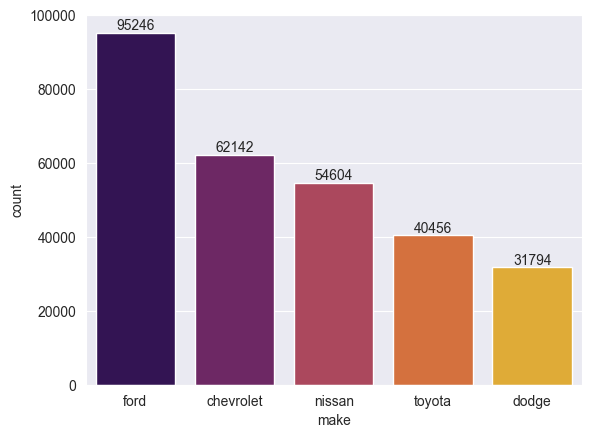

In [358]:
#STEP-3 Which vehicle brands/models are the top sellers overall (in terms of number of vehicles)?

ax = sns.countplot(data = df, x = 'make', order = df.make.value_counts().head(5).index, palette = 'inferno')
for bars in ax.containers:
    ax.bar_label(bars)

In [359]:
#STEP-4 Which vehicle brands/models are the top sellers overall (in terms of total selling price of vehicles) ?

a=df.groupby('make').agg({'sellingprice':'sum'})
a

,sellingprice
make,
acura,83808600
airstream,71000
aston martin,1370300
audi,117966049
bentley,8644250
bmw,462526113
buick,56117525
cadillac,116334746
chevrolet,733952774


In [360]:
b = a.sort_values(by = 'sellingprice', ascending = False).head(6)
b

,sellingprice
make,
ford,1370510898
chevrolet,733952774
nissan,638363615
toyota,492625449
bmw,462526113
mercedes-benz,374910688


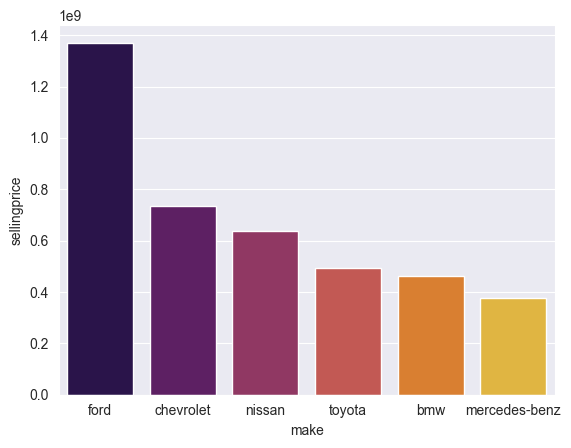

In [361]:
sns.barplot(data = b, x = b.index, y = 'sellingprice', palette = 'inferno')
sns.set_style('darkgrid')
plt.show()

**"1e9" on y-axis means 1 x 10^9 i.e 1 Billion**

**Que-3▪ Is there a seasonal pattern in vehicle sales?**

Text(0.5, 1.0, 'Selling Price Trend Over Months')

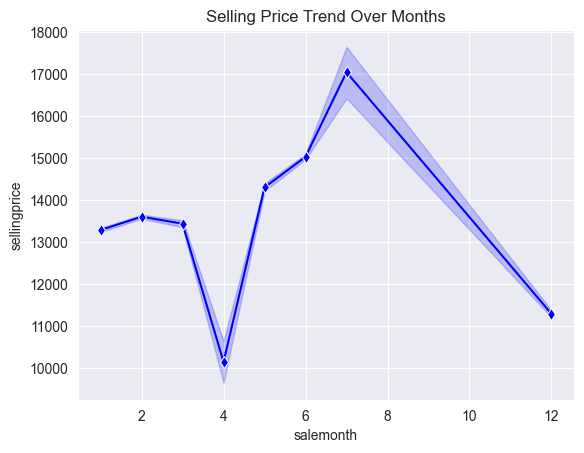

In [368]:
sns.lineplot(data=df,x='salemonth',y='sellingprice', marker = 'd', color = 'blue')

plt.title('Selling Price Trend Over Months')

#### Highest car sales took place in month of JULY & Lowest car sales took place in month of APRIL. ####

**Que-4. What is the average selling price of vehicles in the dataset based on models/brands?**

In [369]:
df.groupby('make').agg({'sellingprice':'mean'})

,sellingprice
make,
acura,13942.538679
airstream,71000.000000
aston martin,54812.000000
audi,19822.895144
bentley,73256.355932
bmw,21629.541386
buick,10691.088779
cadillac,14863.261275
chevrolet,11810.897203


**Que-5. How does the sales performance vary across different regions/countries?**

In [370]:
df.state.unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nj',
       'nv', 'oh', 'mi', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', '3vwd17aj4fm201708', 'ns',
       '3vwd17aj2fm258506', '3vwd17aj3fm276741', '3vwd17aj2fm285365',
       '3vwd17aj0fm227318', '3vwd17aj6fm218641', '3vwd17aj7fm223475',
       '3vwd17aj5fm297123', '3vwd17aj5fm219943', '3vwd17aj9fm219766',
       '3vwd17aj3fm259017', '3vwd17aj5fm206111', '3vwd17aj5fm273601',
       '3vwd17aj5fm221322', '3vwd17aj5fm268964', '3vwd17aj6fm231972',
       '3vwd17aj7fm222388', '3vwd17aj7fm218440', '3vwd17ajxfm315938',
       '3vwd17aj7fm229552', '3vwd17aj8fm298895', '3vwd17aj4fm236636',
       '3vwd17aj5fm225953', '3vwd17aj7fm326640', '3vwd17aj8fm239622',
       '3vwd17aj2fm261566'], dtype=object)

In [371]:
df.state.value_counts().head(38)

state
fl    82945
ca    73148
pa    53907
tx    45913
ga    34750
nj    27784
il    23486
nc    21845
oh    21575
tn    20895
mo    16013
mi    15511
nv    12685
va    12027
md    11158
wi     9851
mn     9429
az     8741
co     7775
wa     7416
ma     6729
ny     5699
in     4325
sc     4251
ne     4013
on     3442
pr     2725
la     2191
ms     1851
ut     1836
qc     1245
hi     1237
or     1155
ab      928
nm      171
ok       72
ns       61
al       26
Name: count, dtype: int64

In [372]:
df.state.value_counts().head(38).sum()

558811

**_There are 26 inappropriate values for states, whereas there are 558811 genuine values for 38 states._**

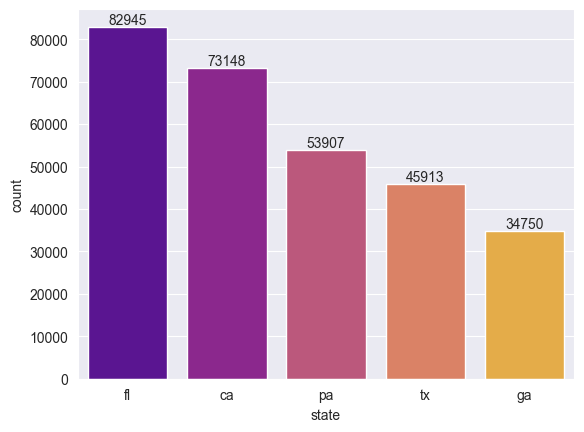

In [373]:
ax = sns.countplot(data = df, x = 'state', order = df.state.value_counts().head(5).index, palette = 'plasma')
for bars in ax.containers:
    ax.bar_label(bars)

#### Highest sales took place from Florida and second highest sales took place from California. ####

##### Que6▪ What are the most popular types of vehicles (sedans, SUVs, trucks, etc.) in terms of sales volume? #####

In [374]:
#STEP-1 checking names in 'body' column
df.body.unique()

array(['SUV', 'Sedan', 'Convertible', 'Coupe', 'Wagon', 'Hatchback',
       'Crew Cab', 'G Coupe', 'G Sedan', 'Elantra Coupe', 'Genesis Coupe',
       'Minivan', 'Van', 'Double Cab', 'CrewMax Cab', 'Access Cab',
       'King Cab', 'SuperCrew', 'CTS Coupe', 'Extended Cab',
       'E-Series Van', 'SuperCab', 'Regular Cab', 'G Convertible', 'Koup',
       'Quad Cab', 'CTS-V Coupe', 'sedan', 'G37 Convertible', 'Club Cab',
       'Xtracab', 'Q60 Convertible', 'CTS Wagon', 'convertible',
       'G37 Coupe', 'Mega Cab', 'Cab Plus 4', 'Q60 Coupe', 'Cab Plus',
       'Beetle Convertible', 'TSX Sport Wagon', 'Promaster Cargo Van',
       'GranTurismo Convertible', 'CTS-V Wagon', 'Ram Van', 'minivan',
       'suv', 'Transit Van', 'Navitgation', 'van', 'regular-cab',
       'g sedan', 'g coupe', 'hatchback', 'king cab', 'supercrew',
       'g convertible', 'coupe', 'crew cab', 'wagon', 'double cab',
       'e-series van', 'regular cab', 'quad cab', 'g37 convertible',
       'supercab', 'extended c

In [375]:
df.body.nunique()

87

In [376]:
df.body = df.body.str.lower()
df.body.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'cab plus', 'beetle convertible',
       'tsx sport wagon', 'promaster cargo van',
       'granturismo convertible', 'cts-v wagon', 'ram van', 'transit van',
       'navitgation', 'regular-cab'], dtype=object)

In [377]:
df.body.nunique()

46

In [378]:
replacements = {'crew cab':'cab','g coupe':'coupe','g sedan':'sedan','elantra coupe':'coupe','genesis coupe':'coupe','minivan':'van','double cab':'cab',
               'crewmax cab':'cab','access cab':'cab','king cab':'cab','cts coupe':'coupe','extended cab':'cab','e-series van':'van','supercab':'cab',
               'regular cab':'cab','g convertible':'convertible','koup':'coupe','quad cab':'cab','cts-v coupe':'coupe','g37 convertible':'convertible',
               'cts wagon':'wagon','g37 coupe':'coupe','mega cab':'cab','cab plus 4':'cab','q60 coupe':'coupe','cab plus':'cab',
                'beetle convertible':'convertible','tsx sport wagon':'wagon','promaster cargo van':'van','granturismo convertible':'convertible',
                'cts-v wagon':'wagon','ram van':'van','transit van':'van','regular-cab':'cab','q60 convertible':'convertible','xtracab':'cab',
                'club cab':'cab','supercrew':'cab'}
df.body = df.body.replace(replacements)

In [379]:
df.body.unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'cab', 'van', 'navitgation'], dtype=object)

In [380]:
df.body.value_counts()

body
sedan          254014
suv            147754
cab             48991
van             32744
hatchback       26609
coupe           20754
wagon           16553
convertible     11392
navitgation        26
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'sedan'),
  Text(1, 0, 'suv'),
  Text(2, 0, 'cab'),
  Text(3, 0, 'van'),
  Text(4, 0, 'hatchback'),
  Text(5, 0, 'coupe'),
  Text(6, 0, 'wagon'),
  Text(7, 0, 'convertible')])

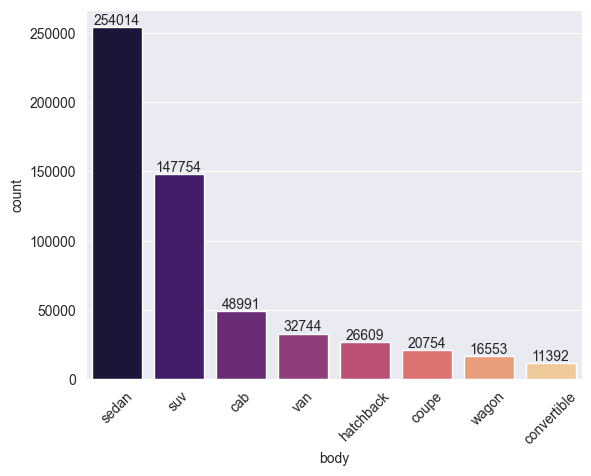

In [381]:
ax = sns.countplot(data = df , x= 'body' , order = df.body.value_counts().head(8).index,palette = 'magma')
for bars in ax.containers:
    ax.bar_label(bars)
sns.set_style('darkgrid')
plt.xticks(rotation = 45)

### Sedan and SUV are the 2 most sold cars body types. ###

#### Que-7.How does the odometer reading affect the selling price of vehicles? ####

In [382]:
a = df['odometer'].corr(df['sellingprice'])
a

-0.582322001289398

##### 1. The negative sign indicates the direction of the correlation. When one variable increases, the other tends to decrease. ##### 
##### 2. In this case, as the odometer reading increases, the selling price tends to decrease. #####

#### Que-8  How does the Manheim Market Report (MMR) value correlate with the actual selling price of vehicles? ####

In [383]:
b= df.mmr.corr(df.sellingprice)
b

0.9836347279159638

##### Since correlation coefficient is very close to 1, we can infer that there is a very strong positive relationship between the Manheim Market Report (MMR) value and the actual selling price of vehicles in the dataset. This suggests that the MMR value is a highly reliable predictor of the actual selling price. #####

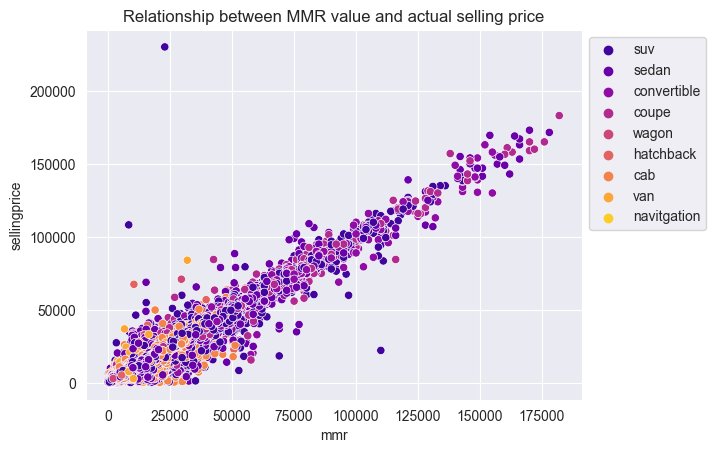

In [324]:
sns.scatterplot(data = df,x = 'mmr', y = 'sellingprice', palette = 'plasma', hue = 'body')

plt.title('Relationship between MMR value and actual selling price')
plt.legend(bbox_to_anchor = (1,1,0,0))
plt.show()